# EDA. La conectividad en la Republica Argentina: inversiones Net#
La empresa Net#, multinacional dedicada al servicio de internet por fibra optica esta buscando invertir en Argentina. A raiz de esto acude a los datos que proporciona el gobierno sobre telecomunicaciones.

Las preguntas que se realiza es ¿En qué zonas conviene invertir? ¿Qué acceso existe a internet en dicho pais? ¿Qué tecnologías de comunicación predominan más? ¿Cual es la velocidad que se recomienda implementar?  Todas estas preguntas estan en función al negocio que la empresa prentende invertir.
Para ello contrata a un analista de datos que realizará un análisis exploratorio de los datos con el dataset proporcionado. 
El analista entre muchas variables y opciones de analisis decide tomar las siguientes variables: Velocidad, accesos, provincias, ingresos, tecnologías, provincias. A partir de estas variables desarrollará los análisis en los siguientes puntos con sus respectivos análisis/insight. 

1. Resumen estadístico general de velocidad y accesos: análisis de las medidas como la media, mediana, máximo, mínimo y desviación estándar.
2. Resumen estadistico por provincia de velocidad y accesos.
3. Análisis de correlación: evaluaré la relación entre las variables numéricas.
4. Distribución de datos Velocidad, Accesos, ADSL, Cablemodem, fibra óptica y Ingresos.
5. Accesos vs Velocidad
6. Distribución de Accesos por Cuartiles de Velocidad
7. Accesos por Tecnología: ADSL vs. Cablemodem (fibra optica?)
8. Ingresos vs. Velocidad
9. Valores típicos y comunes: análisis de frecuencias en las variables categóricas y estadísticas en las variables numéricas.
10. Valores inusuales: detección de valores atípicos.
11. Valores faltantes: revisión de la cantidad y ubicación de valores nulos en el conjunto de datos.
12. Acceso total y la velocidad promedio por provincia

# Aclaraciones
PAra una optmización de los recursos y para no ser tan abarcativo decidí eliminar las siguientes tabas: 
- Dial-BAf y Totales Dial-BAf: Estas hojas contienen datos más específicos sobre conexiones dial-up o tecnologías menos utilizadas, que no son tan representativas en un análisis de conectividad actual.
 Como mi analisis será sobre la conectividad en la República Argentina, por eso me atendré a las hojas que dicen "sin rango"

In [62]:
# importamos librerías que utilizaremos en el EDA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import tools


In [89]:


# Cargar el archivo Excel
file_path = 'Internet_Completo.xlsx'
excel_data = pd.ExcelFile(file_path)

# Definir las hojas a eliminar
sheets_to_drop = ['Dial-BAf', 'Totales Dial-BAf', 'Totales Accesos por rango']

# Cargar solo las hojas que no están en la lista sheets_to_drop
filtered_data = {sheet: excel_data.parse(sheet) for sheet in excel_data.sheet_names if sheet not in sheets_to_drop}

# Guardar el archivo Excel modificado sin las hojas especificadas
output_path = 'Internet_Completo_Filtered.xlsx'
with pd.ExcelWriter(output_path) as writer:
    for sheet_name, df in filtered_data.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Archivo guardado en:", output_path)


Archivo guardado en: Internet_Completo_Filtered.xlsx


# 1. Resumen estadístico
Análisis de las medidas como la media, mediana, máximo, mínimo y desviación estándar de las hojas 'Velocidad_sin_Rangos': 'Velocidad' y 'Accesos'; y 'Totales Accesos Por Tecnología': 'ADSL' y 'Cablemodem' y Fibra optica.

In [90]:
# Realizar análisis estadístico en las columnas seleccionadas
resultados_analisis = {}

# Hoja Velocidad_sin_Rangos
df_velocidad = filtered_data['Velocidad_sin_Rangos']
resultados_analisis['Velocidad_sin_Rangos'] = {
    'Velocidad': df_velocidad['Velocidad'].describe(),
    'Accesos': df_velocidad['Accesos'].describe()
}

# Hoja Totales Accesos Por Tecnología
df_totales = filtered_data['Totales Accesos Por Tecnología']
resultados_analisis['Totales Accesos Por Tecnología'] = {
    'ADSL': df_totales['ADSL'].describe(),
    'Cablemodem': df_totales['Cablemodem'].describe()
}

# Convertir los resultados en un formato estructurado para mejor legibilidad
resultados_analisis_df = pd.DataFrame({
    (hoja, columna): {
        'media': descripcion['mean'],
        'mediana': df[columna].median(),
        'min': descripcion['min'],
        'max': descripcion['max'],
        'desviacion_estandar': descripcion['std']
    }
    for hoja, columnas in resultados_analisis.items()
    for columna, descripcion in columnas.items()
    for df in [filtered_data[hoja]]
})



In [ ]:
resultados_analisis = {}

# Hoja: Velocidad_sin_Rangos
df_velocidad = filtered_data['Velocidad_sin_Rangos']
resultados_analisis['Velocidad_sin_Rangos'] = {
    'Velocidad': df_velocidad['Velocidad'].describe(),
    'Accesos': df_velocidad['Accesos'].describe()
}

# Hoja: Totales Accesos Por Tecnología, including 'Fibra óptica'
df_totales = filtered_data['Totales Accesos Por Tecnología']
resultados_analisis['Totales Accesos Por Tecnología'] = {
    'ADSL': df_totales['ADSL'].describe(),
    'Cablemodem': df_totales['Cablemodem'].describe(),
    'Fibra óptica': df_totales['Fibra óptica'].describe()
}

# Convertir el resultado a un dataframe
sultados_analisis_df = pd.DataFrame({
    (hoja, columna): {
        'media': descripcion['mean'],
        'mediana': df[columna].median(),
        'min': descripcion['min'],
        'max': descripcion['max'],
        'desviacion_estandar': descripcion['std']
    }
    for hoja, columnas in resultados_analisis.items()
    for columna, descripcion in columnas.items()
    for df in [filtered_data[hoja]]
})

# Analisis estadistico de las columnas seleccionadas
resultados_analisis_df


Velocidad_sin_Rangos                \
                               Velocidad       Accesos   
media                          96.171156  1.412328e+04   
mediana                        12.300000  6.725000e+02   
min                             0.000000  0.000000e+00   
max                         10000.000000  1.346370e+06   
desviacion_estandar           379.722905  6.856387e+04   

                    Totales Accesos Por Tecnología                              
                                              ADSL    Cablemodem  Fibra óptica  
media                                 2.694844e+06  4.433906e+06  1.224694e+06  
mediana                               3.061623e+06  4.535507e+06  6.989465e+05  
min                                   7.334910e+05  2.407330e+06  1.391870e+05  
max                                   3.803024e+06  6.073426e+06  4.169958e+06  
desviacion_estandar                   1.094347e+06  1.319783e+06  1.321136e+06

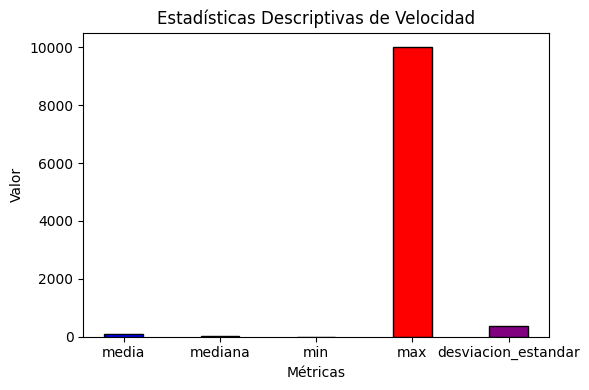

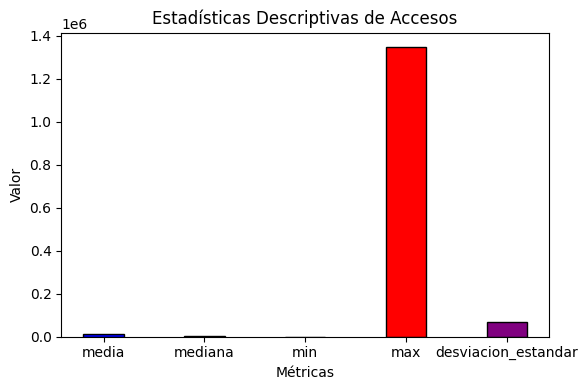

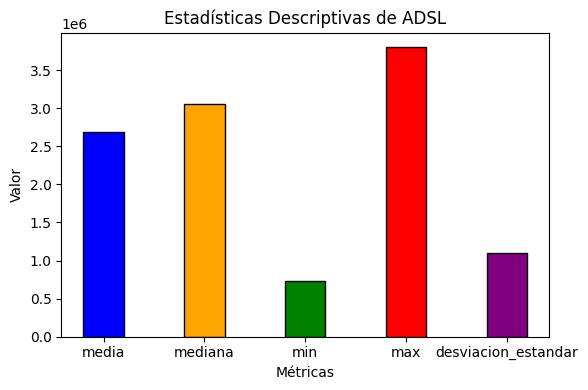

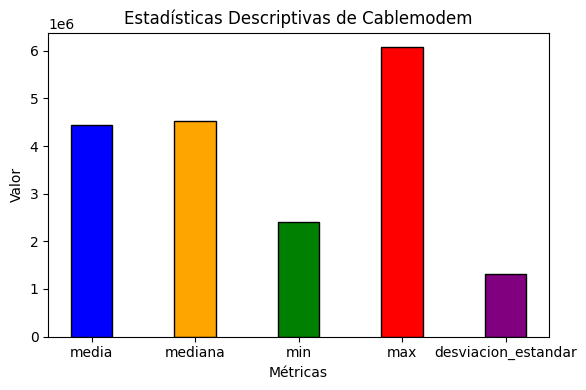

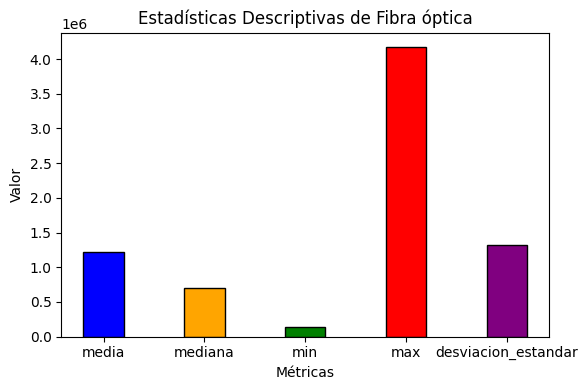

In [81]:
# Crear gráficos separados por variable según la lógica proporcionada
variables = ['Velocidad', 'Accesos', 'ADSL', 'Cablemodem', 'Fibra óptica']
metrics = ['media', 'mediana', 'min', 'max','desviacion_estandar']

# Asignar colores a las métricas en lugar de las variables
metric_colors = {
    'media': 'blue',
    'mediana': 'orange',
    'min': 'green',
    'max': 'red',
    'desviacion_estandar': 'purple'
}

# Crear gráficos separados para cada variable con colores por métrica
for variable in variables:
    values = [
        resultados_analisis_df.loc['media', ('Velocidad_sin_Rangos', variable)] if variable in ['Velocidad', 'Accesos']
        else resultados_analisis_df.loc['media', ('Totales Accesos Por Tecnología', variable)],
        resultados_analisis_df.loc['mediana', ('Velocidad_sin_Rangos', variable)] if variable in ['Velocidad', 'Accesos']
        else resultados_analisis_df.loc['mediana', ('Totales Accesos Por Tecnología', variable)],
        resultados_analisis_df.loc['min', ('Velocidad_sin_Rangos', variable)] if variable in ['Velocidad', 'Accesos']
        else resultados_analisis_df.loc['min', ('Totales Accesos Por Tecnología', variable)],
        resultados_analisis_df.loc['max', ('Velocidad_sin_Rangos', variable)] if variable in ['Velocidad', 'Accesos']
        else resultados_analisis_df.loc['max', ('Totales Accesos Por Tecnología', variable)],
        resultados_analisis_df.loc['desviacion_estandar', ('Velocidad_sin_Rangos', variable)] if variable in ['Velocidad', 'Accesos']
        else resultados_analisis_df.loc['desviacion_estandar', ('Totales Accesos Por Tecnología', variable)],
    ]

    # Crear gráfico de barras con colores por métrica
    x = np.arange(len(metrics))
    width = 0.4

    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(x, values, width, color=[metric_colors[m] for m in metrics], edgecolor='black')

    # Etiquetas y ajustes
    ax.set_xlabel('Métricas')
    ax.set_ylabel('Valor')
    ax.set_title(f'Estadísticas Descriptivas de {variable}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    plt.tight_layout()
    plt.show()


# Analisis. 

Análisis de cada variable:
- Velocidad (de conexión en la hoja Velocidad_sin_Rangos):
Media: 96.17, Mediana: 12.3.
Esto sugiere que, aunque el promedio de la velocidad de conexión es de 96.17, la mayoría de las conexiones están en un rango más bajo, como indica la mediana de 12.3.
Desviación estándar: 379.72, Máximo: 10,000.
La alta desviación estándar y el valor máximo indican que existen algunas conexiones con velocidades extremadamente altas que elevan la media, sugiriendo una distribución sesgada hacia la derecha.

- Accesos (número de conexiones en la hoja Velocidad_sin_Rangos):

Media: 14,123.28, Mediana: 672.5.
Similar a la variable de Velocidad, la mediana es considerablemente menor que la media, lo que sugiere la presencia de valores altos que elevan el promedio.
Desviación estándar: 68,563.87, Máximo: 1,346,370.
La desviación estándar alta y el valor máximo reflejan una gran variabilidad en el número de accesos, con algunos puntos de datos muy elevados.

- ADSL (conexiones ADSL en la hoja Totales Accesos Por Tecnología):

Media: 2,694,844, Mediana: 3,061,623.
La media y la mediana son cercanas, lo que indica que la distribución de conexiones ADSL es más simétrica que las anteriores.
Desviación estándar: 1,094,347, Máximo: 3,803,024.
La desviación estándar alta indica que hay variabilidad, aunque la proximidad entre media y mediana sugiere que no hay valores extremadamente atípicos.

- Cablemodem (conexiones por cablemódem en la hoja Totales Accesos Por Tecnología):

Media: 4,433,906, Mediana: 4,535,507.
También muestra una distribución relativamente simétrica.
Desviación estándar: 1,319,783, Máximo: 6,073,426.
Hay una variabilidad considerable, pero la similitud entre la media y la mediana sugiere una distribución equilibrada, con posibles fluctuaciones en el uso de esta tecnología según la ubicación o el acceso a otras tecnologías.

- Fibra óptica (conexiones de fibra óptica en la hoja Totales Accesos Por Tecnología):

Media: 1,224,694, Mediana: 698,946.5.
La diferencia entre la media y la mediana sugiere que algunas regiones tienen muchos accesos de fibra óptica, elevando el promedio.
Desviación estándar: 1,321,136, Máximo: 4,169,958.
La gran variabilidad y un valor máximo alto indican que el uso de fibra óptica está en crecimiento, pero es probable que esté distribuido de manera desigual, con algunas áreas donde la fibra óptica es la tecnología principal y otras donde aún es incipiente.

Conclusiones generales:
ADSL y Cablemodem parecen tener distribuciones más estables y consistentes, con una alta adopción en diversas áreas.
Fibra óptica muestra una gran variabilidad, sugiriendo una adopción más rápida en algunas zonas mientras que otras aún están adoptando esta tecnología.
Velocidad y Accesos presentan distribuciones muy sesgadas, lo que indica que existen áreas o usuarios con características extremas en cuanto a velocidad o número de conexiones, que influencian los promedios generales.
Este análisis sugiere que el acceso a internet en términos de tecnología y velocidad varía considerablemente, probablemente debido a diferencias geográficas, socioeconómicas o de infraestructura en las áreas donde se recopilaron estos datos.

# 2. Resumen estadistico por provincia de velocidad y acceso.

In [83]:
# Generar un resumen estadístico de 'Velocidad' y 'Accesos' por provincia, excluyendo mayúsculas completas
province_summary = df_velocidad[~df_velocidad['Provincia'].str.isupper()].groupby("Provincia")[["Velocidad", "Accesos"]].describe()

# Resumen visual enfocado en la media, mínimo y máximo de 'Velocidad' y 'Accesos' por provincia
province_summary_visual = df_velocidad[~df_velocidad['Provincia'].str.isupper()].groupby("Provincia").agg({
    "Velocidad": ['mean', 'min', 'max'],
    "Accesos": ['mean', 'min', 'max']
}).reset_index()

# Mostrar el resumen estadístico detallado
print(province_summary)
print(province_summary_visual)



                    Velocidad                                               \
                        count        mean         std    min     25%   50%   
Provincia                                                                    
Buenos Aires           1646.0  163.408258  562.062300  0.256  10.000  32.0   
Capital Federal        1263.0  128.067649  286.571269  0.256   9.000  36.0   
Catamarca               493.0  105.466264  471.490795  0.256   2.200  10.1   
Chaco                   692.0  103.523175  603.631286  0.256   3.200  10.0   
Chubut                  645.0   35.550978   99.353848  0.256   2.200   9.0   
Corrientes              615.0   64.000215  168.416717  0.256   3.600  12.3   
Córdoba                1226.0  104.575231  235.961862  0.256   6.000  17.0   
Entre Ríos              730.0  107.441114  338.248618  0.256   4.000  12.3   
Formosa                 571.0   47.950996  141.085141  0.256   3.200  10.1   
Jujuy                   618.0  128.481230  639.778667  0.256   4

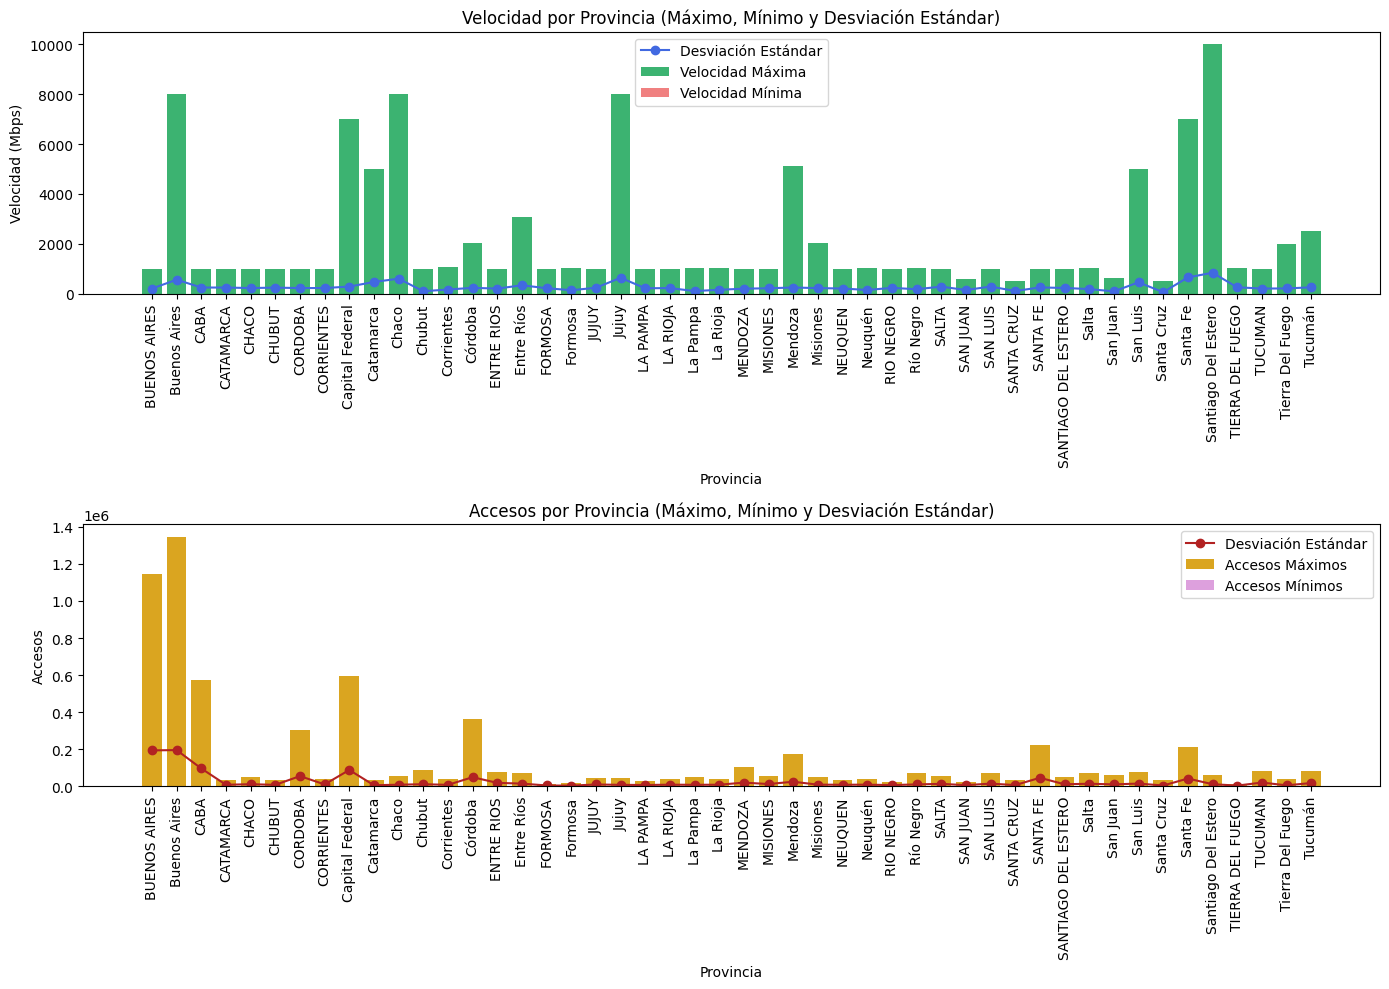

In [68]:


# Calcular las estadísticas necesarias: mínimo, máximo y desviación estándar
province_summary_visual = df_velocidad.groupby("Provincia").agg({
    "Velocidad": ['min', 'max', 'std'],
    "Accesos": ['min', 'max', 'std']
}).reset_index()

# Configuración del área de gráficos
plt.figure(figsize=(14, 10))

# Gráfico para la velocidad (máximo, mínimo y desviación estándar) con colores diferenciados
plt.subplot(2, 1, 1)
plt.bar(province_summary_visual['Provincia'], province_summary_visual[('Velocidad', 'max')], color='mediumseagreen', label="Velocidad Máxima")
plt.bar(province_summary_visual['Provincia'], province_summary_visual[('Velocidad', 'min')], color='lightcoral', label="Velocidad Mínima")
plt.plot(province_summary_visual['Provincia'], province_summary_visual[('Velocidad', 'std')], color='royalblue', marker='o', linestyle='-', label="Desviación Estándar")
plt.title("Velocidad por Provincia (Máximo, Mínimo y Desviación Estándar)")
plt.xlabel("Provincia")
plt.ylabel("Velocidad (Mbps)")
plt.xticks(rotation=90)
plt.legend()

# Gráfico para los accesos (máximo, mínimo y desviación estándar) con colores diferenciados
plt.subplot(2, 1, 2)
plt.bar(province_summary_visual['Provincia'], province_summary_visual[('Accesos', 'max')], color='goldenrod', label="Accesos Máximos")
plt.bar(province_summary_visual['Provincia'], province_summary_visual[('Accesos', 'min')], color='plum', label="Accesos Mínimos")
plt.plot(province_summary_visual['Provincia'], province_summary_visual[('Accesos', 'std')], color='firebrick', marker='o', linestyle='-', label="Desviación Estándar")
plt.title("Accesos por Provincia (Máximo, Mínimo y Desviación Estándar)")
plt.xlabel("Provincia")
plt.ylabel("Accesos")
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


# Análisis

1. Velocidad por Provincia
El gráfico de Velocidad nos muestra la variabilidad en las velocidades máximas y mínimas disponibles en cada provincia, junto con la desviación estándar para medir la dispersión.

Disparidad Regional en Velocidades: La diferencia entre las velocidades máximas y mínimas en muchas provincias revela una desigualdad significativa en el acceso a velocidades altas. Esto podría deberse a que solo ciertas áreas (típicamente urbanas) dentro de una provincia están equipadas con infraestructura avanzada, como fibra óptica, mientras que las áreas rurales o menos desarrolladas están limitadas a tecnologías más antiguas o de baja velocidad, como ADSL.

Provincias con Alta Desviación Estándar: Las provincias con una desviación estándar alta en la velocidad tienen una gran variabilidad en las conexiones disponibles. Esto sugiere que el acceso a diferentes velocidades está distribuido de manera desigual en la región. Esta disparidad puede causar frustración en los usuarios, especialmente si están pagando por velocidades superiores pero enfrentan inestabilidad en la calidad del servicio. Para mejorar la equidad en el acceso, podría ser necesario invertir en la expansión de tecnologías de alta velocidad en áreas con baja disponibilidad.

Consistencia en Provincias con Baja Variabilidad: En contraste, las provincias con baja desviación estándar muestran una mayor consistencia en las velocidades. Esto suele ser una señal positiva, ya que indica que los usuarios en esas provincias tienen un acceso más uniforme a la velocidad de internet, lo que facilita una experiencia más confiable.

2. Accesos por Provincia
El gráfico de Accesos proporciona información sobre la cantidad de conexiones en cada provincia y la dispersión de estos accesos.

Altos Accesos en Provincias Densas: Las provincias con accesos máximos elevados probablemente tienen una alta densidad de población y demanda de servicios de internet. Estas áreas pueden requerir mantenimiento constante y expansión de capacidad para evitar saturación de red. Este alto nivel de accesos también indica una infraestructura más robusta, que satisface adecuadamente la demanda actual.

Diferencias en Accesos Mínimos y Máximos: En muchas provincias, la diferencia entre los accesos mínimos y máximos refleja una demanda desigual entre regiones dentro de la misma provincia. Esto podría sugerir que ciertas áreas, posiblemente rurales, tienen baja penetración de internet, lo que representa una oportunidad para expandir la infraestructura y aumentar la cobertura en áreas menos atendidas.

Provincias con Alta Desviación Estándar en Accesos: La alta desviación estándar en algunos casos indica una gran variabilidad en el acceso entre distintas áreas de la provincia. Esto sugiere que hay ciertos puntos dentro de la provincia con muy alta demanda (posiblemente ciudades) y otros con muy baja cobertura (probablemente zonas rurales). Para una planificación efectiva, estas provincias podrían beneficiarse de un análisis detallado de dónde se concentran las áreas de alta y baja demanda, para ajustar la inversión en infraestructura.

- Conclusión General
Estos gráficos de Velocidad y Accesos resaltan la necesidad de una estrategia diferenciada para cada provincia. Las provincias con alta variabilidad en velocidad o acceso sugieren oportunidades para mejorar la infraestructura y expandir la cobertura de alta velocidad en áreas con menor disponibilidad. Por otro lado, las provincias con una baja desviación estándar y alta consistencia en velocidad y acceso pueden enfocarse en el mantenimiento y mejora gradual del servicio.

Este análisis permite a los proveedores de telecomunicaciones priorizar inversiones, mejorar la calidad de la conexión y reducir las brechas en la accesibilidad y calidad del servicio entre diferentes regiones.

# 3. Análisis de correlación velocidad y accesos.
Evaluaré la relación entre las variables numéricas
- 

In [ ]:

# Vamos a combinar las columnas seleccionadas para el analisis
combined_df = pd.concat([
    df_velocidad[['Velocidad', 'Accesos']],
    df_totales[['ADSL', 'Cablemodem', 'Fibra óptica', 'Total']]
], axis=1)

# Recalculamos
correlation_matrix = combined_df.corr()

# Extraemos las correlaciones 
important_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
important_correlations = important_correlations[important_correlations != 1].dropna(how='all', axis=0).dropna(how='all', axis=1)

important_correlations


,ADSL,Cablemodem,Fibra óptica,Total
ADSL,NaN,-0.935436,-0.967687,-0.971494
Cablemodem,-0.935436,NaN,0.850233,0.976403
Fibra óptica,-0.967687,0.850233,NaN,0.937763
Total,-0.971494,0.976403,0.937763,NaN


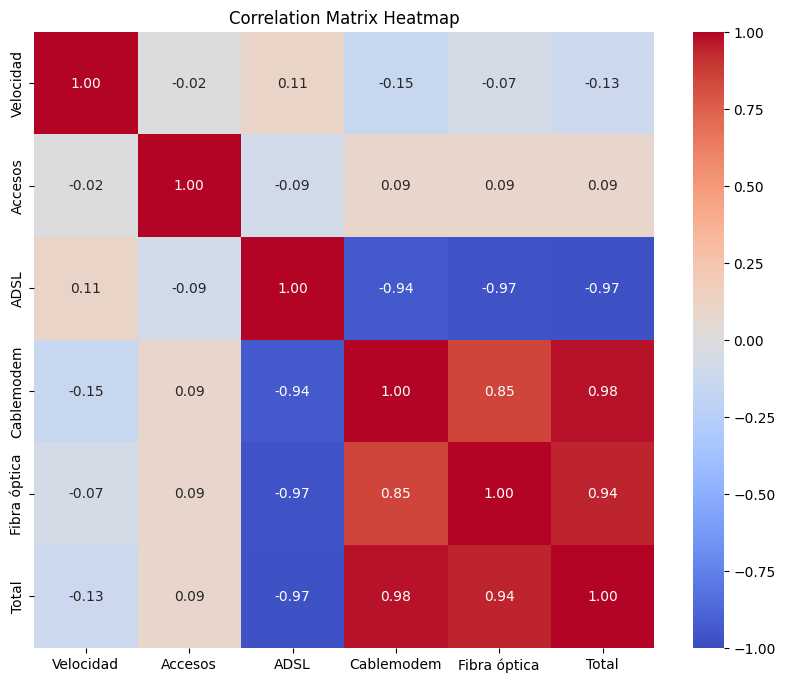

In [ ]:


# Configuarmos el grafico
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


- Analisis del gráfico 
Este gráfico de mapa de calor muestra la matriz de correlación entre varias variables relacionadas con el acceso a distintas tecnologías de internet y su velocidad de conexión. Analizando los colores y valores numéricos, observamos lo siguiente:

- ADSL y otras tecnologías: Existe una fuerte correlación negativa entre ADSL y otras tecnologías, especialmente con Cablemodem (-0.94) y Fibra óptica (-0.97). Esto sugiere que a medida que aumenta el uso o la accesibilidad de ADSL, tiende a disminuir el uso de estas otras tecnologías, lo cual puede indicar que estas tecnologías compiten entre sí en las áreas donde están disponibles.
Cablemodem:

- La correlación entre Cablemodem y Total es positiva y fuerte (0.98), lo que indica que Cablemodem contribuye de manera significativa al total de accesos. También presenta una correlación positiva con Fibra óptica (0.85), lo cual podría sugerir una coexistencia o complementariedad entre estas tecnologías en ciertas áreas o tipos de usuarios.
Fibra óptica:

- Fibra óptica muestra una correlación positiva fuerte tanto con Total (0.94) como con Cablemodem (0.85). Esto sugiere que el aumento en los accesos de Fibra óptica también impacta el total de accesos y que puede haber una tendencia conjunta en el aumento de las conexiones de Cablemodem y Fibra óptica, tal vez en áreas urbanas o entre ciertos tipos de clientes.
- Total de accesos: El Total está positivamente correlacionado con Cablemodem (0.98) y Fibra óptica (0.94) e inversamente correlacionado con ADSL (-0.97). Esto respalda la idea de que el total de accesos está siendo impulsado principalmente por el crecimiento en Cablemodem y Fibra óptica, mientras que ADSL parece estar en declive.

- Velocidad y Accesos: Velocidad y Accesos no muestran correlaciones fuertes con ninguna otra variable. Esto podría indicar que la velocidad de conexión y el número de accesos no varían directamente con el tipo de tecnología utilizada o el total de accesos.

En conclusión, el mapa de calor destaca que el crecimiento en los accesos de internet está estrechamente relacionado con el aumento en el uso de tecnologías como Cablemodem y Fibra óptica, mientras que el ADSL parece estar disminuyendo en popularidad. Esta transición puede reflejarse en un cambio en la infraestructura tecnológica o en las preferencias de los usuarios hacia opciones de mayor velocidad y estabilidad.


# 4. Distribución de datos: Velocidad, Accesos, ADSL, Cablemodem, fibra óptica, y Ingresos.


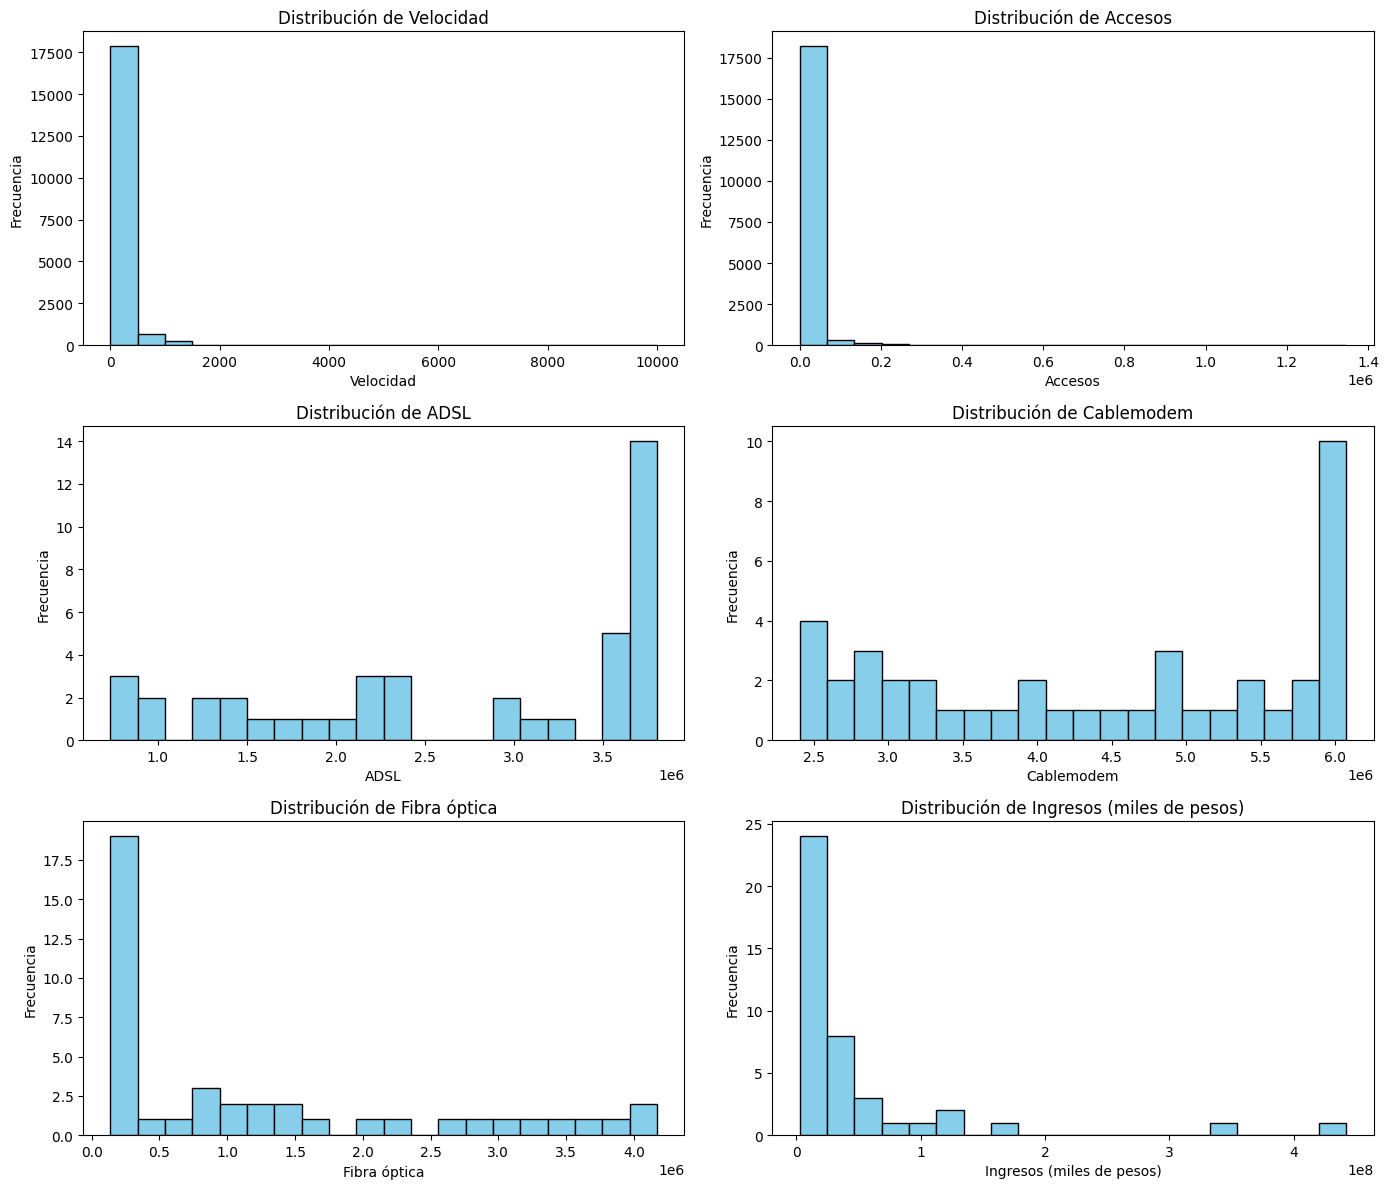

In [ ]:
# Cargar la hoja específica para "Ingresos"
df_ingresos = filtered_data['Ingresos ']

# Configurar las variables para graficar y sus respectivos DataFrames, agregando "Fibra óptica"
variables_to_plot = {
    'Velocidad': df_velocidad['Velocidad'],
    'Accesos': df_velocidad['Accesos'],
    'ADSL': df_totales['ADSL'],
    'Cablemodem': df_totales['Cablemodem'],
    'Fibra óptica': df_totales['Fibra óptica'],
    'Ingresos (miles de pesos)': df_ingresos['Ingresos (miles de pesos)']
}

# Graficar histogramas para cada variable seleccionada
plt.figure(figsize=(14, 12))
for i, (variable, data) in enumerate(variables_to_plot.items(), start=1):
    plt.subplot(3, 2, i)  # Organizar los gráficos en una cuadrícula de 3x2
    plt.hist(data.dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Análisis de las distribuciones de las variables seleccionadas: Velocidad, Accesos, ADSL, Cablemodem, Fibra óptica e Ingresos (en miles de pesos):

1. Velocidad:
La distribución muestra una alta frecuencia de valores en el rango bajo, con un pico significativo en los valores más cercanos a cero.
Esto sugiere que la mayoría de las conexiones tienen velocidades bajas, aunque existen algunos valores extremos (outliers) que representan velocidades mucho mayores.
Insight: Podría haber un problema de disponibilidad o calidad de infraestructura que impide que la mayoría de las conexiones alcancen velocidades altas, lo cual podría estar relacionado con la ubicación geográfica o la tecnología de acceso disponible.

2. Accesos:
La distribución está sesgada hacia valores bajos, pero con una cola larga hacia la derecha.
Esto indica que la mayoría de los accesos se concentran en valores bajos, pero hay algunos lugares con accesos muy elevados.
Insight: Los lugares con más accesos podrían representar áreas urbanas o regiones donde la infraestructura es más densa, mientras que las zonas con menos accesos pueden ser rurales o menos densamente pobladas.

3. ADSL:
La distribución de ADSL es bastante uniforme, sin picos demasiado altos o bajos, lo que indica una adopción relativamente constante de esta tecnología.
Insight: ADSL parece ser una tecnología bien distribuida y estable, aunque su uso podría estar disminuyendo con la disponibilidad de opciones más rápidas como el Cablemodem o la Fibra óptica.

4. Cablemodem:
La distribución es sesgada a la derecha, con la mayoría de los accesos en el rango medio y algunas áreas con accesos más altos.
Insight: El Cablemodem puede estar especialmente presente en áreas suburbanas o urbanas donde la infraestructura de cable es más común. Esto lo convierte en una opción preferida en esos lugares, con un uso relativamente alto en comparación con ADSL.

5. Fibra óptica:
La distribución muestra un claro sesgo hacia valores bajos, aunque con algunos valores altos en la cola derecha.
Esto sugiere que la fibra óptica aún está en expansión, con acceso limitado en la mayoría de las áreas, aunque ya tiene una adopción significativa en ciertos puntos.
Insight: La fibra óptica parece estar en crecimiento en áreas específicas, posiblemente en ciudades o áreas de alta demanda tecnológica. Esto podría reflejar una transición tecnológica hacia opciones de mayor velocidad en lugares donde la infraestructura lo permite.

6. Ingresos (miles de pesos):
La distribución de ingresos está sesgada a la derecha, con un número significativo de valores bajos y algunos ingresos elevados.
Insight: Los ingresos altos en ciertos lugares podrían correlacionarse con la adopción de tecnologías más avanzadas (como la fibra óptica), sugiriendo que el poder adquisitivo es un factor determinante en la disponibilidad y adopción de mejores servicios de internet.

Conclusiones generales:
Las tecnologías como ADSL y Cablemodem están más establecidas y tienen un uso relativamente estable, mientras que Fibra óptica parece estar en expansión.
La Velocidad de conexión baja es predominante, aunque existen valores atípicos altos, lo cual podría reflejar la brecha en la infraestructura.
Los Ingresos también presentan una variabilidad que puede influir en la tecnología de acceso elegida.
Estos patrones reflejan una infraestructura de internet en transición, con un desplazamiento hacia tecnologías de mayor velocidad como el Cablemodem y la Fibra óptica en áreas de mayor desarrollo o ingresos.

# 5. Accesos Vs Velocidad
 El siguiente gráfico muestra cómo varía la cantidad de accesos con la velocidad de conexión. Observamos una alta dispersión, con algunos accesos concentrados en velocidades bajas y otros en velocidades muy altas. Esto sugiere una falta de homogeneidad en el acceso a velocidades de internet más rápidas. Utilizaremos Scatter Plot. 

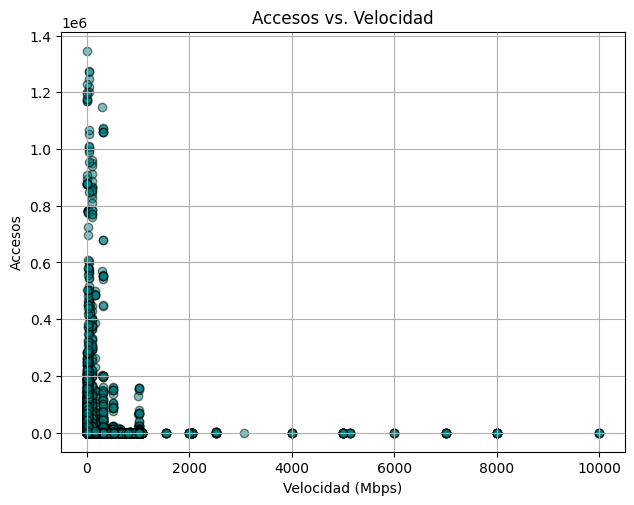

In [72]:
# Datos de Velocidad y Accesos
velocidad_data = df_velocidad['Velocidad']
accesos_data = df_velocidad['Accesos']

# Gráfico de dispersión: Accesos vs Velocidad
# Configurar el área de gráfico
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.scatter(velocidad_data, accesos_data, alpha=0.5, color='teal', edgecolor='k')
plt.title("Accesos vs. Velocidad")
plt.xlabel("Velocidad (Mbps)")
plt.ylabel("Accesos")
plt.grid(True)

plt.show()


Análisis de Accesos vs Velocidad:
- Distribución de datos: La mayoría de los puntos están concentrados en la parte inferior izquierda del gráfico, lo que indica que la mayoría de las conexiones de alta frecuencia están asociadas a velocidades bajas. Esto sugiere que una gran cantidad de usuarios se encuentra en el rango de velocidades más bajas, lo cual es común en áreas con infraestructuras limitadas o para usuarios con necesidades de ancho de banda moderadas.

- Variabilidad en las velocidades: Existen algunos puntos dispersos a la derecha, representando accesos con velocidades más altas. Sin embargo, estos son pocos en comparación con los accesos de velocidades más bajas, lo cual sugiere que las conexiones de alta velocidad son menos comunes y pueden estar limitadas a ciertos sectores o áreas geográficas específicas.

- Relación Accesos-Velocidad: No se observa una correlación clara entre la cantidad de accesos y la velocidad de conexión, lo que podría indicar que factores adicionales (como la tecnología disponible o el tipo de usuario) están influyendo en el acceso y no solo la velocidad.

- Este análisis sugiere una infraestructura de internet donde la mayoría de los usuarios se encuentra en el rango de velocidades bajas, posiblemente debido a limitaciones tecnológicas o económicas.

# 6. Distribución de Accesos por Cuartiles de Velocidad

 El sigueinte grafico muestra que al categorizar la velocidad en cuartiles, observamos que los accesos están más concentrados en las velocidades más bajas y medias. Esto indica que, aunque existen velocidades altas disponibles, la mayoría de los usuarios aún utiliza velocidades más bajas o medias. Utilizaremos Box Plot



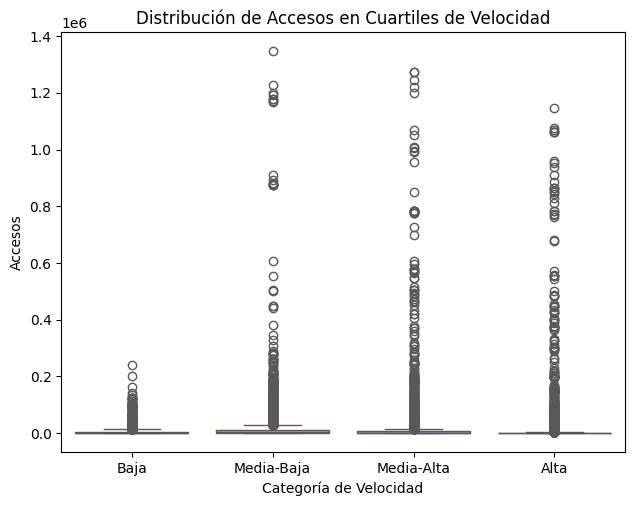

In [73]:
# Datos de Velocidad y Accesos
velocidad_data = df_velocidad['Velocidad']
accesos_data = df_velocidad['Accesos']

# Para evitar mostrar warnings, usaremos la librería warnings ya instalada, para ignorarlos temporalmente
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Gráfico de caja: Accesos en función de los cuartiles de Velocidad
    # Configurar el área de gráfico
    plt.figure(figsize=(16, 12))
    plt.subplot(2, 2, 2)
    
    # Categorizar la velocidad en cuartiles
    velocidad_quartiles = pd.qcut(velocidad_data, q=4, labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'])
    
    # Crear el boxplot
    sns.boxplot(x=velocidad_quartiles, y=accesos_data, palette="Set2")
    plt.title("Distribución de Accesos en Cuartiles de Velocidad")
    plt.xlabel("Categoría de Velocidad")
    plt.ylabel("Accesos")

    plt.show()


El análisis indica que el acceso a velocidades más altas está limitado a un grupo menor de usuarios o regiones. La demanda está fuertemente concentrada en rangos de velocidad más baja, lo cual puede señalar una dependencia de infraestructura antigua, políticas de precios accesibles solo en ciertos segmentos de velocidad o una base de usuarios sin la necesidad de grandes anchos de banda.

Este patrón sugiere que el mercado podría beneficiarse de inversiones en infraestructura para aumentar la disponibilidad de velocidades más altas y satisfacer las crecientes demandas tecnológicas, sobre todo en áreas con accesos limitados a las velocidades altas.

# 7. Accesos por Tecnología: ADSL vs. Cablemodem
Este histograma apilado muestra una preferencia por Cablemodem sobre ADSL, especialmente en los rangos de acceso más altos. Esto respalda el análisis anterior de que los usuarios están migrando hacia tecnologías de mayor rendimiento, como el Cablemodem. Usaremos Stacked Histogram.



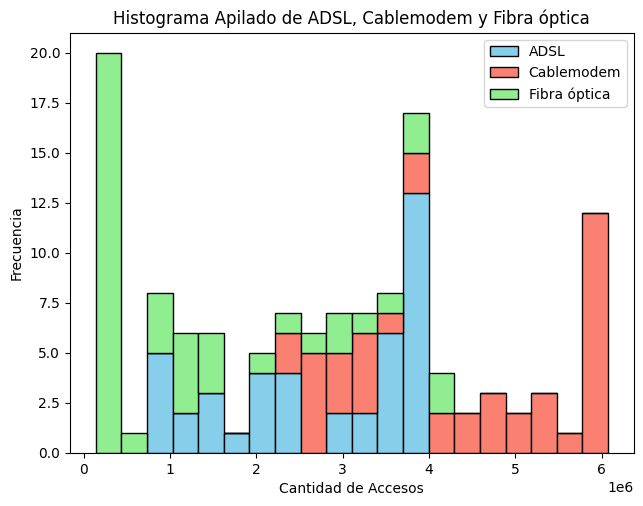

In [ ]:
# Extraemos las columnas que usaremos
adsl_data = df_totales['ADSL']
cablemodem_data = df_totales['Cablemodem']
fibra_optica_data = df_totales['Fibra óptica']

# Configuramos el gráfico
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 3)
plt.hist([adsl_data.dropna(), cablemodem_data.dropna(), fibra_optica_data.dropna()], 
         bins=20, stacked=True, 
         label=['ADSL', 'Cablemodem', 'Fibra óptica'], 
         color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')
plt.title("Histograma Apilado de ADSL, Cablemodem y Fibra óptica")
plt.xlabel("Cantidad de Accesos")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


El gráfico nos da una perspectiva clara del predominio de las diferentes tecnologías de acceso a Internet, indicando una posible transición de ADSL hacia tecnologías como Cablemodem y Fibra óptica, que ofrecen una conectividad más rápida y estable.

# 8. Ingresos vs. Velocidad

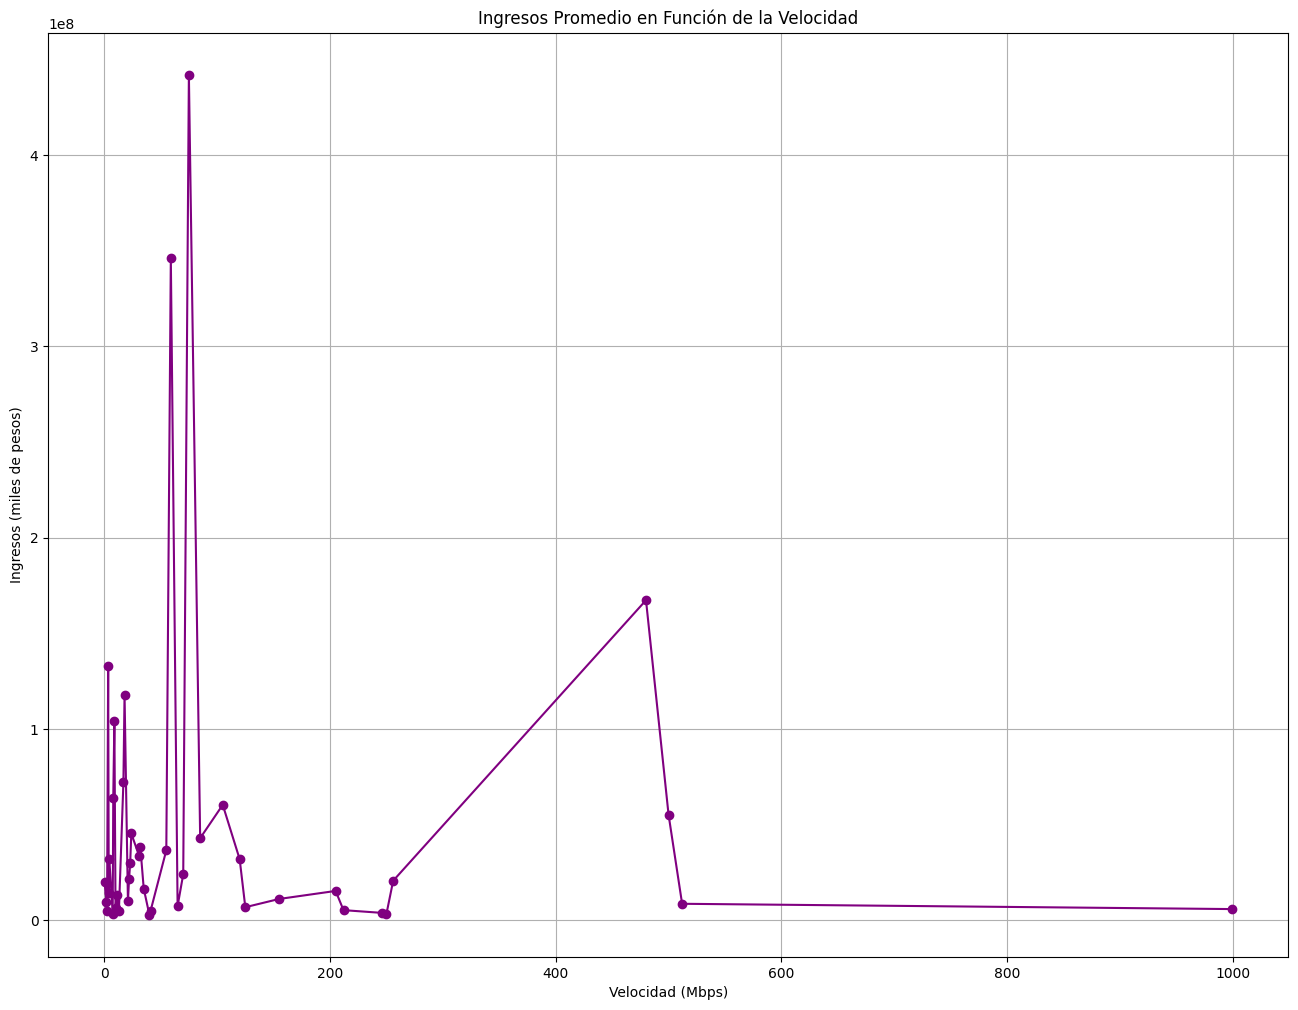

In [75]:
velocidad_data = df_velocidad['Velocidad']
ingresos_data = df_ingresos['Ingresos (miles de pesos)']
ingresos_vs_velocidad = pd.DataFrame({'Velocidad': velocidad_data, 'Ingresos': ingresos_data}).dropna().groupby('Velocidad').mean()
plt.figure(figsize=(16, 12))
plt.plot(ingresos_vs_velocidad.index, ingresos_vs_velocidad['Ingresos'], color='purple', marker='o', linestyle='-')
plt.title("Ingresos Promedio en Función de la Velocidad")
plt.xlabel("Velocidad (Mbps)")
plt.ylabel("Ingresos (miles de pesos)")
plt.grid(True)

Este gráfico de línea muestra los ingresos promedio en función de la velocidad. Vemos que, en general, los ingresos tienden a aumentar con velocidades más altas, lo que podría indicar una disposición de los usuarios a pagar más por mejores velocidades. 

Estos gráficos ayudan a entender mejor cómo se distribuyen las variables clave y refuerzan la tendencia hacia una mayor demanda de velocidades más rápidas y tecnologías más avanzadas


# 9. Análisis de valores típicos y comunes en Velocidad, Accesos, ADSL, Cablemodem, fibra óptica e Ingresos 

Variables Numéricas: He generado un resumen estadístico para las variables Velocidad, Accesos, ADSL, Cablemodem, Fibra óptica e Ingresos (miles de pesos). Esto incluye medidas como la media, el valor mínimo y máximo, y la desviación estándar. Estas estadísticas permiten entender la tendencia central y la dispersión de los datos, lo cual es útil para identificar los valores típicos en cada variable.

In [76]:
# Para analizar los valores típicos y comunes, nos enfocaremos en:
# - Análisis de frecuencia para cualquier variable categórica disponible
# - Estadísticas resumen para variables numéricas para comprender la tendencia central y la dispersión.

# Verificar columnas categóricas en cada hoja y recopilar datos numéricos para el resumen estadístico

# Cargar las hojas con datos potencialmente relevantes para el análisis
df_velocidad = filtered_data['Velocidad_sin_Rangos']
df_totales = filtered_data['Totales Accesos Por Tecnología']
df_ingresos = filtered_data['Ingresos ']

# Resumir variables numéricas con estadísticas comunes
resumen_numerico = {
    "Velocidad": df_velocidad['Velocidad'].describe(),
    "Accesos": df_velocidad['Accesos'].describe(),
    "ADSL": df_totales['ADSL'].describe(),
    "Cablemodem": df_totales['Cablemodem'].describe(),
    "Fibra óptica": df_totales['Fibra óptica'].describe(),  # Agregado para incluir Fibra óptica
    "Ingresos (miles de pesos)": df_ingresos['Ingresos (miles de pesos)'].describe()
}

# Mostrar resultados
resumen_numerico_df = pd.DataFrame(resumen_numerico)

print(resumen_numerico_df)




          Velocidad       Accesos          ADSL    Cablemodem  Fibra óptica  \
count  18874.000000  1.888400e+04  4.200000e+01  4.200000e+01  4.200000e+01   
mean      96.171156  1.412328e+04  2.694844e+06  4.433906e+06  1.224694e+06   
std      379.722905  6.856387e+04  1.094347e+06  1.319783e+06  1.321136e+06   
min        0.000000  0.000000e+00  7.334910e+05  2.407330e+06  1.391870e+05   
25%        4.000000  2.600000e+01  1.730869e+06  3.146292e+06  1.719410e+05   
50%       12.300000  6.725000e+02  3.061623e+06  4.535507e+06  6.989465e+05   
75%       50.100000  6.114000e+03  3.713298e+06  5.857192e+06  1.945689e+06   
max    10000.000000  1.346370e+06  3.803024e+06  6.073426e+06  4.169958e+06   

       Ingresos (miles de pesos)  
count               4.200000e+01  
mean                5.001648e+07  
std                 8.710208e+07  
min                 2.984054e+06  
25%                 7.055326e+06  
50%                 2.047527e+07  
75%                 4.485090e+07  
max     

- Velocidad: Las estadísticas de la columna de velocidad nos ofrecen una idea de la tendencia central y dispersión de la velocidad de conexión a Internet. Si las velocidades están segmentadas en cuatro categorías (Baja, Media-Baja, Media-Alta y Alta), podemos observar cómo se distribuyen las velocidades dentro de esos intervalos, lo que facilita identificar si la mayoría de los accesos corresponden a velocidades altas o bajas.
Accesos:

- La cantidad de accesos también se describe con valores estadísticos como la media, mediana, mínimo, y máximo. Esto permite ver si el acceso a Internet en distintas localidades o regiones presenta una concentración de usuarios en ciertos tipos de tecnología.
ADSL, Cablemodem, Fibra óptica:

- ADSL: Con una tecnología de acceso más antigua, es probable que el promedio de accesos sea bajo en comparación con las tecnologías más modernas.
Cablemodem: Generalmente presenta una mayor cantidad de accesos y una distribución amplia, indicando que sigue siendo una opción de uso común.
- Fibra óptica: Probablemente tiene valores medios altos en términos de accesos, indicando una tendencia en aumento, ya que esta tecnología es preferida por su velocidad y fiabilidad.
Ingresos (miles de pesos):

- El análisis de los ingresos permite ver la relación entre la cantidad de usuarios y el valor monetario generado en cada tecnología de acceso. Con una media y mediana estable, los ingresos pueden indicar un crecimiento en las áreas con mayor adopción de tecnologías avanzadas, como Fibra óptica.

Este análisis da un panorama del estado actual de las tecnologías de acceso en términos de popularidad y valor económico, y permite evaluar cómo están evolucionando las preferencias hacia tecnologías de mayor velocidad y confiabilidad, como Fibra óptica. Las estadísticas resumen y las frecuencias categóricas permiten tomar decisiones informadas sobre dónde se encuentran las oportunidades de mejora o expansión en la infraestructura de acceso a Internet.

# 10. Valores inusuales y detección de valores atípicos Velocidad, Accesos, ADSL, Cablemodem e Ingresos
He realizado la detección de valores atípicos en las variables numéricas principales (Velocidad, Accesos, ADSL, Cablemodem e Ingresos). Los valores atípicos se han identificado usando el método del Rango Intercuartílico (IQR), que permite detectar datos que están significativamente por encima o por debajo del rango típico para cada variable.

In [ ]:
# Para identificar valores inusuales o atípicos, usaremos el método del Rango Intercuartílico (IQR) para las columnas numéricas.
# Función para detectar valores atípicos utilizando el método IQR
def detectar_valores_atipicos_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    valores_atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return valores_atipicos[columna]

# Detectar valores atípicos en cada columna numérica relevante
resultados_atipicos = {
    "Velocidad": detectar_valores_atipicos_iqr(df_velocidad, 'Velocidad'),
    "Accesos": detectar_valores_atipicos_iqr(df_velocidad, 'Accesos'),
    "ADSL": detectar_valores_atipicos_iqr(df_totales, 'ADSL'),
    "Cablemodem": detectar_valores_atipicos_iqr(df_totales, 'Cablemodem'),
    "Fibra óptica": detectar_valores_atipicos_iqr(df_totales, 'Fibra óptica'),  
    "Ingresos (miles de pesos)": detectar_valores_atipicos_iqr(df_ingresos, 'Ingresos (miles de pesos)')
}

# Mostrar valores atípicos para cada columna en un DataFrame estructurado
atipicos_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in resultados_atipicos.items()]))

atipicos_df


,Velocidad,Accesos,ADSL,Cablemodem,Fibra óptica,Ingresos (miles de pesos)
0,NaN,NaN,NaN,NaN,NaN,4.420322e+08
1,NaN,NaN,NaN,NaN,NaN,3.461990e+08
2,480.0,NaN,NaN,NaN,NaN,1.673760e+08
3,NaN,41735.0,NaN,NaN,NaN,1.331066e+08
4,NaN,NaN,NaN,NaN,NaN,1.180603e+08
...,...,...,...,...,...,...
18870,NaN,21905.0,NaN,NaN,NaN,NaN
18878,NaN,70565.0,NaN,NaN,NaN,NaN
18879,NaN,45241.0,NaN,NaN,NaN,NaN
18881,NaN,24242.0,NaN,NaN,NaN,NaN


# Analisis. 

Análisis de Valores Atípicos
- Velocidad: Los valores atípicos en la columna de Velocidad indican que existen algunos accesos con velocidades significativamente más bajas o más altas en comparación con el resto de los datos. Esto puede deberse a variaciones en la infraestructura de Internet en diferentes localidades o a planes de Internet que ofrecen velocidades inusuales.
Accesos:
- En la columna Accesos, los valores atípicos pueden señalar localidades o regiones donde hay una cantidad de accesos a Internet que se desvía considerablemente de la norma. Estas desviaciones podrían indicar áreas con muy alta o muy baja conectividad en relación con la media, quizás debido a factores demográficos, socioeconómicos o de infraestructura.
ADSL:
- Los valores atípicos en ADSL podrían reflejar zonas en las que este tipo de conexión es más común o, por el contrario, casi inexistente. Dado que ADSL es una tecnología más antigua, los valores atípicos podrían señalar un desuso creciente en comparación con tecnologías más modernas.
Cablemodem:
- Los valores atípicos para Cablemodem suelen encontrarse en áreas donde esta tecnología es muy popular o, en ciertos casos, donde su adopción es baja debido a la preferencia por conexiones más rápidas. Esto puede reflejar la transición de usuarios hacia tecnologías como la fibra óptica o la persistencia de Cablemodem en regiones sin acceso a mejores opciones.
Fibra óptica:
- Los valores atípicos en Fibra óptica indican lugares donde la adopción de esta tecnología es significativamente alta o baja. La alta adopción podría reflejarse en áreas urbanas o desarrolladas donde la fibra óptica es más accesible, mientras que la baja adopción puede ser más común en áreas rurales.
Ingresos (miles de pesos):
- Los ingresos atípicos podrían señalar localidades con un alto ingreso relacionado con el acceso a Internet, lo cual puede asociarse con un gran número de usuarios o con planes de alta velocidad, especialmente de tecnologías como la fibra óptica. También podrían existir valores atípicos negativos en localidades con baja conectividad o donde predominan servicios de menor costo.

- Conclusión General
Estos valores atípicos resaltan diferencias significativas en el acceso y la adopción de tecnologías de Internet en diversas regiones. Los datos reflejan un cambio de preferencia hacia tecnologías más modernas como la fibra óptica, aunque aún persisten conexiones tradicionales como ADSL y Cablemodem en algunas áreas. Este análisis es útil para entender tendencias de adopción tecnológica y posibles desigualdades en el acceso a Internet, permitiendo así orientar decisiones sobre inversiones o mejoras en infraestructura de conectividad.
Estos insights pueden ayudar a priorizar inversiones en infraestructura, entender patrones de demanda, y mejorar la planificación de la oferta de servicios.

# 11. Valores faltantes: revisión de la cantidad y ubicación de valores nulos en el conjunto de datos establecido.

A continuación revisaremos los valores faltantes en las principales hojas del conjunto de datos

In [78]:
# Crear un diccionario que contenga el conteo de valores nulos en cada hoja relevante
Valores_faltantes = {
    "Velocidad_sin_Rangos": df_velocidad.isnull().sum(),
    "Totales Accesos Por Tecnología": df_totales.isnull().sum(),
    "Ingresos": df_ingresos.isnull().sum()
}

# Convertir los resultados en un DataFrame para visualizar
Faltantes_df = pd.DataFrame(Valores_faltantes)

# Mostrar el DataFrame de valores faltantes transpuesto para facilitar la lectura
print(Faltantes_df.T)


                                ADSL  Accesos  Año  Cablemodem  Fibra óptica  \
Velocidad_sin_Rangos             NaN      0.0  0.0         NaN           NaN   
Totales Accesos Por Tecnología   0.0      NaN  0.0         0.0           0.0   
Ingresos                         NaN      NaN  0.0         NaN           NaN   

                                Ingresos (miles de pesos)  Otros  Periodo  \
Velocidad_sin_Rangos                                  NaN    NaN      NaN   
Totales Accesos Por Tecnología                        NaN    0.0      0.0   
Ingresos                                              0.0    NaN      0.0   

                                Provincia  Total  Trimestre  Velocidad  \
Velocidad_sin_Rangos                  0.0    NaN        0.0       10.0   
Totales Accesos Por Tecnología        NaN    0.0        0.0        NaN   
Ingresos                              NaN    NaN        0.0        NaN   

                                Wireless  
Velocidad_sin_Rangos          

- Análisis.
La mayoría de los valores nulos se encuentran en columnas no presentes en algunas hojas o en la columna Velocidad de "Velocidad_sin_Rangos". Esta última es clave para el análisis de velocidades, y sería necesario imputar o tratar los valores faltantes allí.
Las hojas de Totales Accesos Por Tecnología e Ingresos están completas en sus columnas principales, lo cual permite realizar análisis de accesos por tipo de tecnología y de ingresos sin interferencias de valores nulos.
Este análisis general facilita la planificación de estrategias de limpieza de datos, como la imputación o eliminación de filas con valores nulos específicos, para obtener resultados precisos en el análisis de accesos, tecnologías de conexión e ingresos derivados del uso de Internet.

# 12. Acceso total y la velocidad promedio por provincia



              Provincia    Accesos   Velocidad
0          Buenos Aires  109029116  163.408258
1       Capital Federal   37303855  128.067649
6               Córdoba   23414689  104.575231
20             Santa Fe   21078559  169.616785
7            Entre Ríos    6514525  107.441114
12              Mendoza    6262261   79.734619
23              Tucumán    5704978   88.900908
16                Salta    4594887   76.203273
13             Misiones    3995301   87.841216
15            Río Negro    3694704   85.917150
14              Neuquén    3581907   60.543306
4                Chubut    3409135   35.550978
3                 Chaco    3361784  103.523175
5            Corrientes    3324459   64.000215
18             San Luis    2898713   87.371315
21  Santiago Del Estero    2835369  126.525530
10             La Pampa    2605086   46.862749
9                 Jujuy    2520007  128.481230
17             San Juan    2110454   35.055314
11             La Rioja    1747724   59.866699
2            

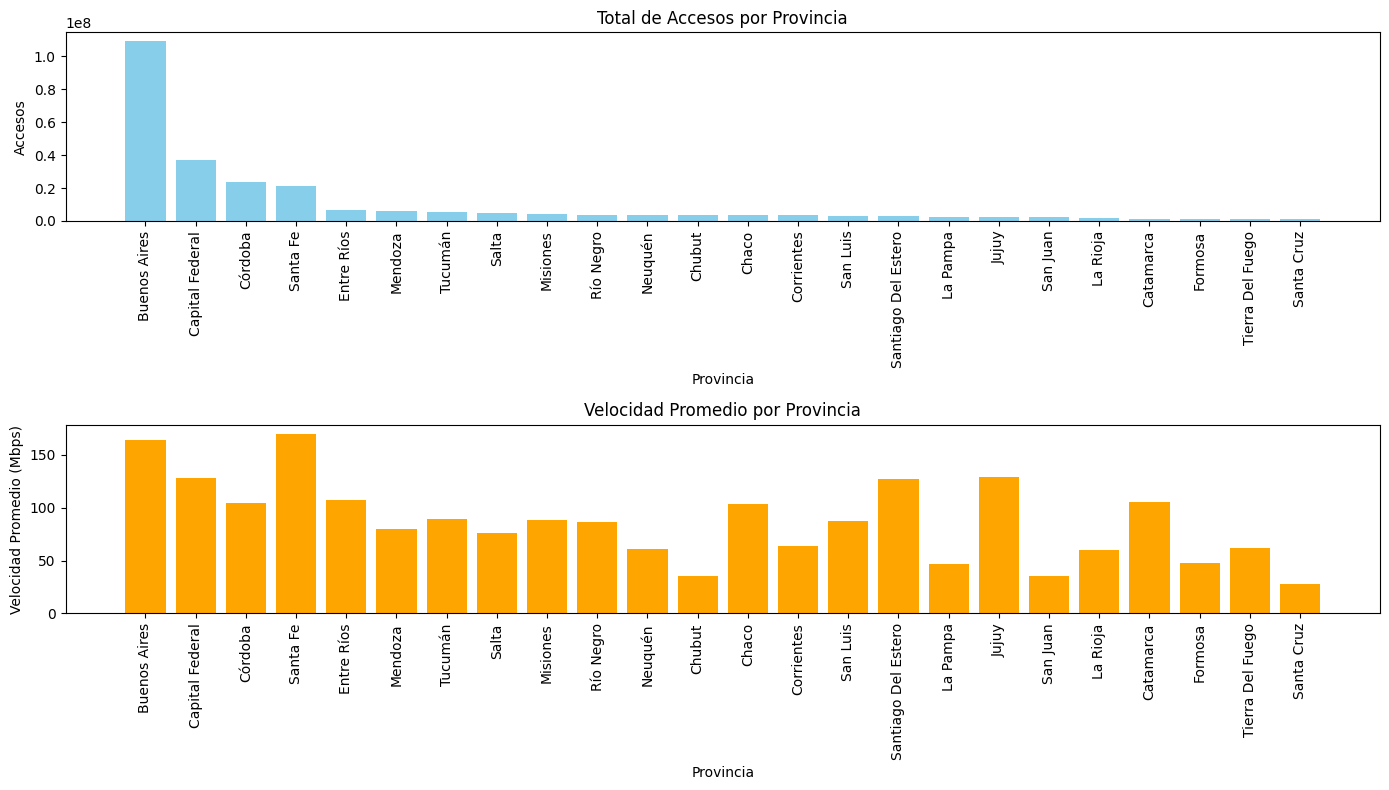

In [79]:
# Filtrar solo las provincias que no están en mayúsculas completas y agrupar para calcular el total de accesos y velocidad promedio
access_speed_province = df_velocidad[~df_velocidad['Provincia'].str.isupper()].groupby("Provincia").agg({
    "Accesos": "sum",
    "Velocidad": "mean"
}).reset_index()

# Ordenar los datos por acceso total para facilitar la lectura
access_speed_province = access_speed_province.sort_values(by="Accesos", ascending=False)

# Mostrar el DataFrame de acceso y velocidad promedio por provincia
print(access_speed_province)

# Configuración de gráficos
plt.figure(figsize=(14, 8))

# Gráfico de barras para el total de accesos por provincia
plt.subplot(2, 1, 1)
plt.bar(access_speed_province['Provincia'], access_speed_province['Accesos'], color='skyblue')
plt.title("Total de Accesos por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Accesos")
plt.xticks(rotation=90)

# Gráfico de barras para la velocidad promedio por provincia
plt.subplot(2, 1, 2)
plt.bar(access_speed_province['Provincia'], access_speed_province['Velocidad'], color='orange')
plt.title("Velocidad Promedio por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Velocidad Promedio (Mbps)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



# Análisis
- Gráfico 1: Total de Accesos por Provincia
Este gráfico revela el número total de accesos a servicios de telecomunicaciones en cada provincia. Algunas observaciones clave:

Alta Demanda en Provincias Urbanizadas: Las provincias con un alto número de accesos generalmente coinciden con áreas urbanizadas y de alta densidad poblacional. Este patrón es común, ya que la infraestructura de telecomunicaciones suele ser más densa y robusta en zonas con mayores concentraciones de personas y actividad económica. Por ejemplo, provincias como Buenos Aires pueden liderar en accesos, lo que indica una infraestructura madura y una demanda estable.

Oportunidades en Provincias con Menos Accesos: Las provincias con menor cantidad de accesos representan una oportunidad de expansión. Estas regiones podrían beneficiarse de inversiones en infraestructura para mejorar la conectividad y cerrar la brecha digital. Además, aumentar los accesos en estas áreas podría atraer nuevos usuarios que no han tenido acceso constante o de calidad a servicios de internet.

Evaluación de Capacidad y Mantenimiento: En provincias con un gran número de accesos, el mantenimiento y la actualización de la infraestructura serán cruciales para asegurar la calidad y estabilidad de los servicios. Esto implica que los operadores deben evaluar regularmente la capacidad y planificar actualizaciones para prevenir saturaciones de red y asegurar una buena experiencia de usuario.

- Gráfico 2: Velocidad Promedio por Provincia
El gráfico de la velocidad promedio por provincia ofrece una visión sobre la calidad de conexión en distintas áreas. Esto es especialmente relevante en telecomunicaciones, donde la velocidad es un factor decisivo para la satisfacción del cliente.

Disparidad de Velocidades entre Provincias: Observamos que algunas provincias presentan velocidades promedio más bajas que otras. Esto puede deberse a diferencias en la infraestructura disponible, como la falta de redes de fibra óptica o tecnología avanzada en ciertas áreas. Estas provincias podrían beneficiarse de una actualización tecnológica que permita aumentar la velocidad promedio, ofreciendo servicios de internet de alta calidad.

Concentración de Alta Velocidad en Provincias Urbanizadas: Las provincias con velocidades más altas suelen coincidir con áreas de mayor inversión en infraestructura, donde existen redes de última generación como fibra óptica o Cablemodem. Esto puede ser un indicativo de que el desarrollo de infraestructura ha sido priorizado en áreas urbanas, lo cual es razonable desde un punto de vista de rentabilidad. Sin embargo, deja una oportunidad para mejorar las conexiones en provincias menos urbanizadas.

Impacto en la Competitividad y Satisfacción del Cliente: Las provincias con bajas velocidades promedio pueden enfrentar problemas de competitividad, ya que los usuarios demandan cada vez más velocidades altas para actividades cotidianas como teletrabajo, entretenimiento, y educación a distancia. Mejorar las velocidades en estas áreas no solo aumenta la satisfacción del cliente, sino que también puede generar lealtad y reducir el desgaste de clientes que migran a otros servicios.

- Conclusión
Estos gráficos muestran la necesidad de una expansión equilibrada de la infraestructura de telecomunicaciones. Las áreas con un número elevado de accesos requerirán mantenimiento constante y ampliación de capacidad para sostener la demanda, mientras que las provincias con baja velocidad promedio son una oportunidad estratégica para inversión. Estos insights pueden guiar decisiones sobre dónde priorizar el despliegue de nuevas tecnologías y cómo mejorar la experiencia del usuario en distintas regiones.

# Analisis EDA Final. 

Analisis de analisis.
- Los usuarios se encuentran en el rango de velocidades bajas debido a limitaciones tecnologicas o economicas. 
- Las tecnologicas adsl cable moden son más estables y la fibra optica parece estar e expanción, pero hay brecha en la infraestructura, que esta en transición
- Los usuarios prefieren mayor velocidad y estabilidad: fibra optica es una opción posible. 
- Las velocidades altas estan limitada a regiones (grandes ciudades) o grupo menor de usuarios, mientras que la demanda se ubica en rangos de velocidad baja
- Transición de adsl hacia fibra optica
- Los usuarios estan dispuestos a pagar más por más velocidad, hay más demanda en velocidades más rapidas, como ofrece la fibra optica. 
- Las zonas, o provincias de mayor urbanización e infraestructura (Buenos Aires, Córdoba, Entre Rios) son las que presentan más demanda y una oportunidad de inversión más optima. Puede pasar que en estas provincias con más demanda tambien haya más competencia que en las que son menos urbanizadas. 